In [13]:
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


In [98]:

# Load audio
audio_path = 'harvard.wav'
y, sr = librosa.load(audio_path)

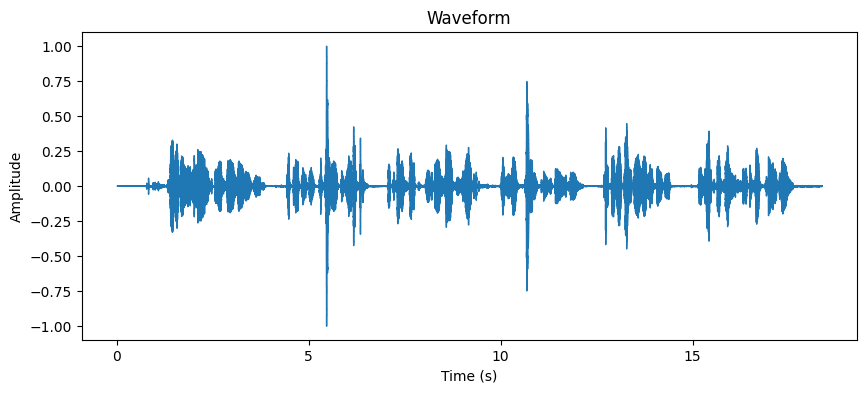

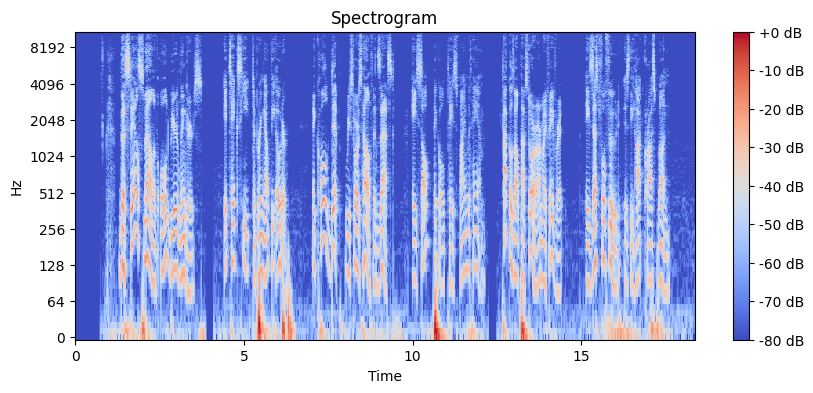

In [99]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [100]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)


In [101]:
scaler = StandardScaler()
mfccs_scaled = scaler.fit_transform(mfccs.T)  # Transpose for scaling


In [102]:

distance_matrix = squareform(pdist(mfccs_scaled, metric='euclidean'))


C:\Users\anujk\AppData\Local\Temp\ipykernel_25552\71537228.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')  # You can choose other methods like 'average' or 'complete'


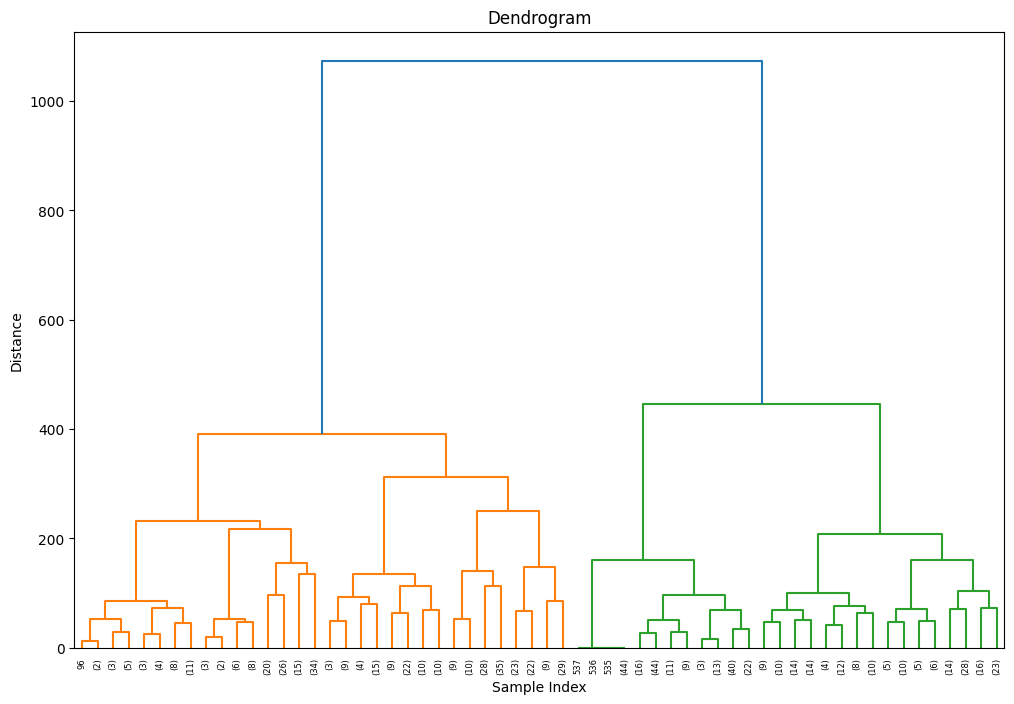

In [103]:

# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')  # You can choose other methods like 'average' or 'complete'

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [104]:
from scipy.cluster.hierarchy import fcluster

max_d = 570  # This threshold can be adjusted based on the visual analysis
clusters = fcluster(Z, max_d, criterion='distance')

# Print the cluster labels for each sample
print("Cluster labels:", clusters)
# print(len(clusters))
unique_labels, counts = np.unique(clusters, return_counts=True)

# Print unique cluster labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples")

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2
 2 2 2 2 2 2 1 1 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1
 1 1 1 1 

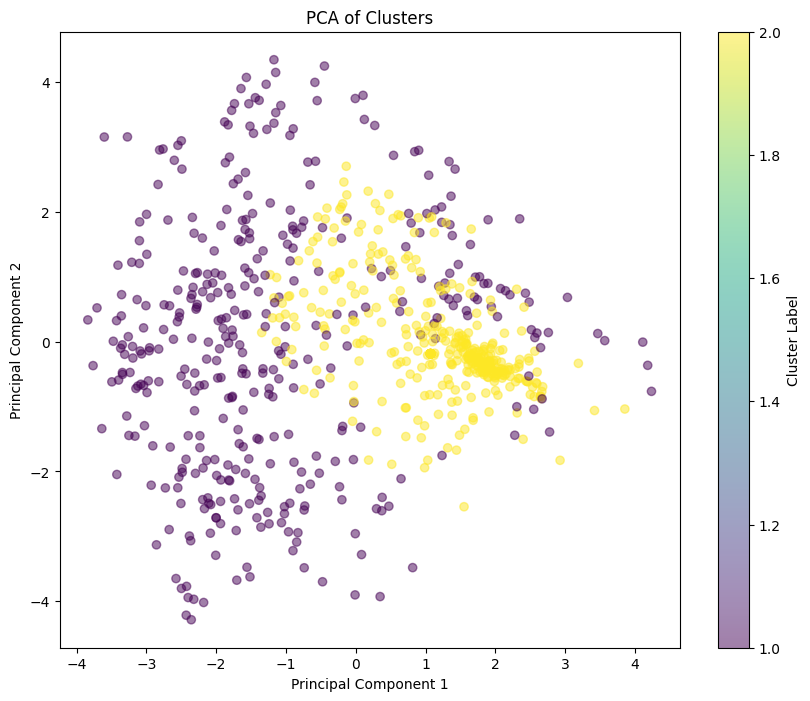

In [105]:
from sklearn.decomposition import PCA

# Assuming `mfccs_scaled` is your feature matrix after scaling
pca = PCA(n_components=2)
pca_result = pca.fit_transform(mfccs_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


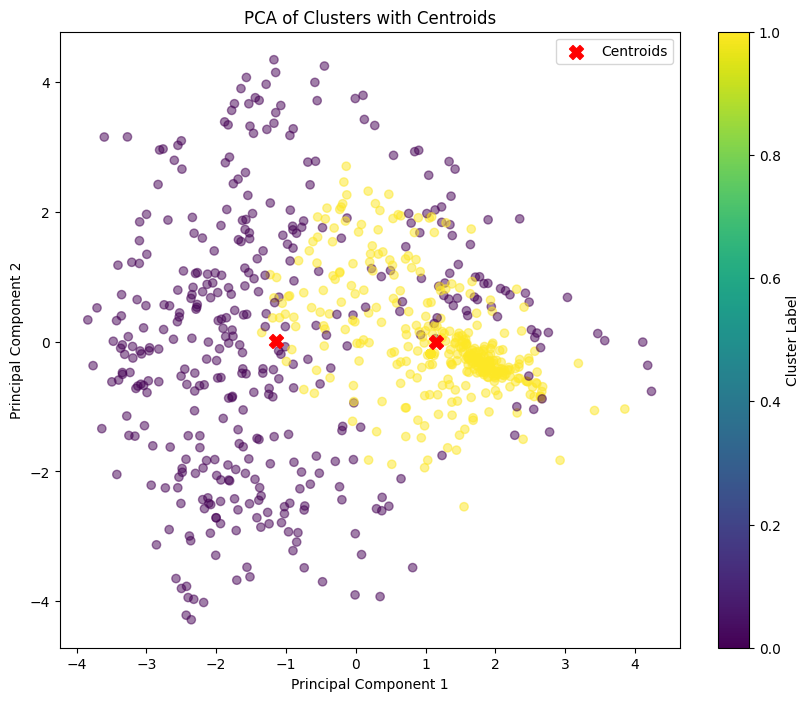

In [106]:
import numpy as np

# Calculate centroids for each cluster
centroids = np.array([mfccs_scaled[clusters == i].mean(axis=0) for i in np.unique(clusters)])

# 2D Scatter Plot with centroids
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.title('PCA of Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()
